In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df = pd.read_csv("streamworks_user_data.csv")
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [4]:
df.info()
df.isnull().sum()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
count,1498.000000,1497.000000,1499,1498,1498,1497,1497,1496.000000,1498.000000,1497.000000,1497,1497,1499.000000,1355.000000
unique,NaN,NaN,3,819,1,6,3,NaN,NaN,NaN,2,2,NaN,NaN
top,NaN,NaN,Female,26-01-23,13-07-25,Canada,Basic,NaN,NaN,NaN,No,Yes,NaN,NaN
freq,NaN,NaN,510,6,1498,262,505,NaN,NaN,NaN,763,752,NaN,NaN
mean,1750.871829,43.738811,NaN,NaN,NaN,NaN,NaN,39.903342,51.414419,2.498330,NaN,NaN,0.234156,10.180406
std,433.060980,15.083920,NaN,NaN,NaN,NaN,NaN,22.978288,28.580117,1.706829,NaN,NaN,0.423612,3.310705
min,1001.000000,18.000000,NaN,NaN,NaN,NaN,NaN,0.500000,0.000000,0.000000,NaN,NaN,0.000000,5.990000
25%,1376.250000,31.000000,NaN,NaN,NaN,NaN,NaN,19.450000,27.100000,1.000000,NaN,NaN,0.000000,5.990000
50%,1750.500000,44.000000,NaN,NaN,NaN,NaN,NaN,40.300000,52.700000,2.000000,NaN,NaN,0.000000,9.990000
75%,2125.750000,56.000000,NaN,NaN,NaN,NaN,NaN,59.800000,76.200000,4.000000,NaN,NaN,0.000000,13.990000


In [5]:
for col in ["gender","country","subscription_type","received_promotions","referred_by_friend","is_churned"]:
    print("\n", col)
    print(df[col].value_counts(dropna=False))



 gender
gender
Female    510
Other     506
Male      483
NaN         1
Name: count, dtype: int64

 country
country
Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
NaN          3
Name: count, dtype: int64

 subscription_type
subscription_type
Basic       505
Premium     499
Standard    493
NaN           3
Name: count, dtype: int64

 received_promotions
received_promotions
No     763
Yes    734
NaN      3
Name: count, dtype: int64

 referred_by_friend
referred_by_friend
Yes    752
No     745
NaN      3
Name: count, dtype: int64

 is_churned
is_churned
0.0    1148
1.0     351
NaN       1
Name: count, dtype: int64


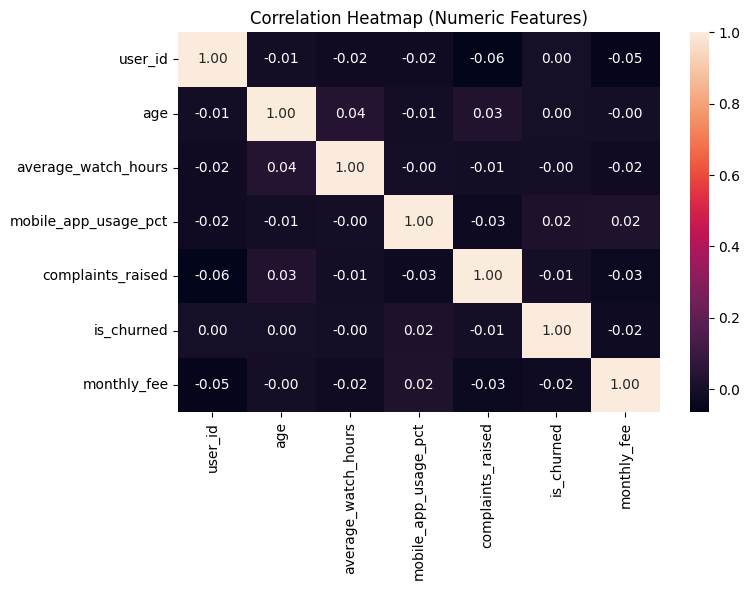

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

In [7]:
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
df["last_active_date"] = pd.to_datetime(df["last_active_date"], errors="coerce")

C:\Users\khali\AppData\Local\Temp\ipykernel_21292\3124947156.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")


In [8]:
df["tenure_days"] = (df["last_active_date"] - df["signup_date"]).dt.days
df["is_loyal"] = (df["tenure_days"] > 180).astype(int)

In [9]:
# Numeric
for col in ["age","monthly_fee","average_watch_hours","mobile_app_usage_pct","complaints_raised","tenure_days"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df["age"] = df["age"].fillna(df["age"].median())
df["monthly_fee"] = df["monthly_fee"].fillna(df["monthly_fee"].median())
df["average_watch_hours"] = df["average_watch_hours"].fillna(df["average_watch_hours"].median())
df["mobile_app_usage_pct"] = df["mobile_app_usage_pct"].fillna(df["mobile_app_usage_pct"].median())
df["complaints_raised"] = df["complaints_raised"].fillna(0)

# Tenure: if date parsing failed, fill with median tenure
df["tenure_days"] = df["tenure_days"].fillna(df["tenure_days"].median())
df["is_loyal"] = (df["tenure_days"] > 180).astype(int)

# Categorical
for col in ["gender","country","subscription_type","received_promotions","referred_by_friend"]:
    df[col] = df[col].astype(str).str.strip().str.title().replace({"Nan": np.nan})

df["gender"] = df["gender"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["subscription_type"] = df["subscription_type"].fillna("Unknown")
df["received_promotions"] = df["received_promotions"].fillna("No")
df["referred_by_friend"] = df["referred_by_friend"].fillna("No")


In [10]:
df["watch_per_fee_ratio"] = df["average_watch_hours"] / df["monthly_fee"].replace(0, np.nan)
df["watch_per_fee_ratio"] = df["watch_per_fee_ratio"].fillna(0)

df["heavy_mobile_user"] = (df["mobile_app_usage_pct"] >= 70).astype(int)

# Example interaction
df["promo_and_low_watch"] = ((df["received_promotions"]=="Yes") & (df["average_watch_hours"] < df["average_watch_hours"].median())).astype(int)


In [11]:
def chi_square_test(feature):
    table = pd.crosstab(df[feature], df["is_churned"])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    return table, chi2, p

for feat in ["gender", "received_promotions", "referred_by_friend"]:
    table, chi2, p = chi_square_test(feat)
    print("\nFeature:", feat)
    print(table)
    print("Chi2:", round(chi2,3), "p-value:", round(p,5))



Feature: gender
is_churned  0.0  1.0
gender              
Female      375  135
Male        378  105
Other       395  110
Unknown       0    1
Chi2: 7.433 p-value: 0.0593

Feature: received_promotions
is_churned           0.0  1.0
received_promotions          
No                   573  193
Yes                  575  158
Chi2: 2.569 p-value: 0.10897

Feature: referred_by_friend
is_churned          0.0  1.0
referred_by_friend          
No                  565  182
Yes                 583  169
Chi2: 0.645 p-value: 0.42179


In [12]:
watch_churned = df.loc[df["is_churned"]==1, "average_watch_hours"]
watch_retained = df.loc[df["is_churned"]==0, "average_watch_hours"]

t_stat, p_val = stats.ttest_ind(watch_churned, watch_retained, equal_var=False, nan_policy="omit")
t_stat, p_val


(np.float64(-0.179439324603901), np.float64(0.8576561255517949))

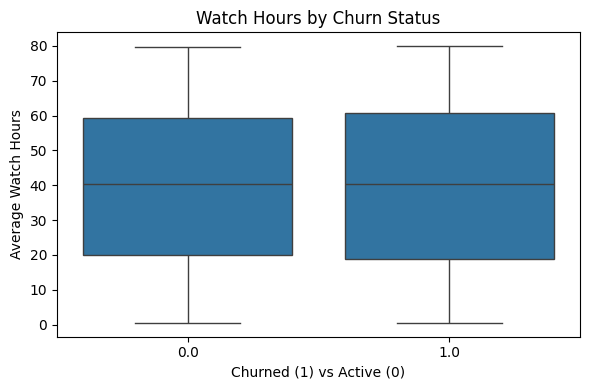

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_churned", y="average_watch_hours")
plt.title("Watch Hours by Churn Status")
plt.xlabel("Churned (1) vs Active (0)")
plt.ylabel("Average Watch Hours")
plt.tight_layout()
plt.show()


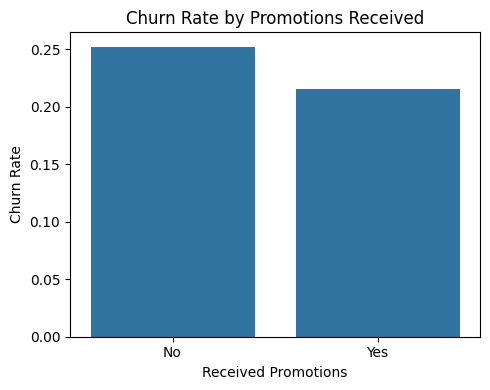

In [14]:
promo_churn = df.groupby("received_promotions")["is_churned"].mean().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(data=promo_churn, x="received_promotions", y="is_churned")
plt.title("Churn Rate by Promotions Received")
plt.xlabel("Received Promotions")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# --- Clean target: is_churned ---
# If it's already numeric 0/1 this will keep it.
# If it's strings like "Yes/No", "True/False", "Churned/Active", this maps to 1/0.
df["is_churned"] = (
    df["is_churned"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        "1": 1, "0": 0,
        "yes": 1, "no": 0,
        "true": 1, "false": 0,
        "churned": 1, "active": 0,
        "nan": np.nan, "none": np.nan, "": np.nan
    })
)

# Convert to numeric safely
df["is_churned"] = pd.to_numeric(df["is_churned"], errors="coerce")

# Drop rows where target is missing (must do this for modelling)
before = len(df)
df = df.dropna(subset=["is_churned"]).copy()
df["is_churned"] = df["is_churned"].astype(int)
after = len(df)

print("Dropped rows with missing is_churned:", before - after)
print(df["is_churned"].value_counts())


Dropped rows with missing is_churned: 1
is_churned
0    1148
1     351
Name: count, dtype: int64


In [17]:
# One-hot encode categoricals
X = df.drop(columns=["is_churned","user_id","signup_date","last_active_date"])
X = pd.get_dummies(X, drop_first=True)

y = df["is_churned"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       287
           1       0.00      0.00      0.00        88

    accuracy                           0.77       375
   macro avg       0.38      0.50      0.43       375
weighted avg       0.59      0.77      0.66       375

ROC-AUC: 0.514


C:\Users\khali\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\khali\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\khali\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

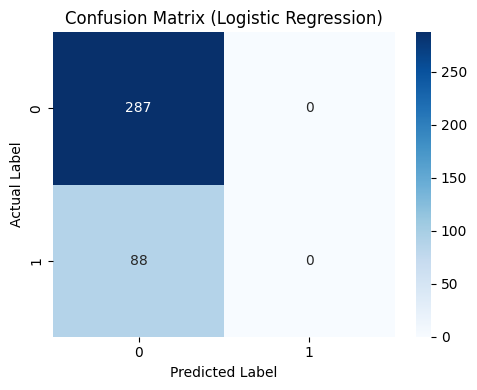

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

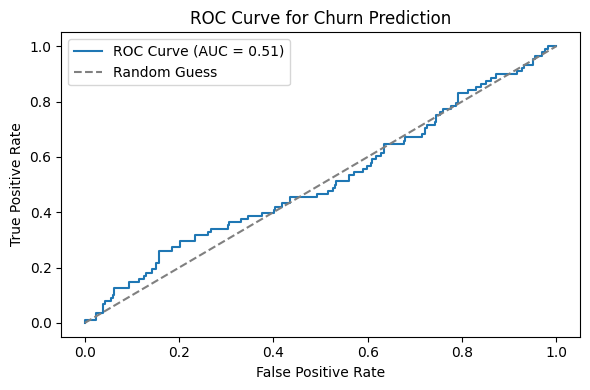

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random Guess")
plt.title("ROC Curve for Churn Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
coef = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
coef.head(10)

watch_per_fee_ratio         -0.260513
country_Unknown             -0.194600
subscription_type_Unknown   -0.194243
gender_Unknown               0.183437
promo_and_low_watch         -0.154276
is_loyal                     0.149992
average_watch_hours          0.145507
gender_Other                -0.134163
gender_Male                 -0.127500
heavy_mobile_user           -0.116664
dtype: float64

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = lin.predict(X2_test)

# Compute metrics (version-safe)
mse = mean_squared_error(y2_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, pred)
r2 = r2_score(y2_test, pred)

rmse, mae, r2


(np.float64(7.382872060470119), 6.089280998380746, 0.894849371450791)

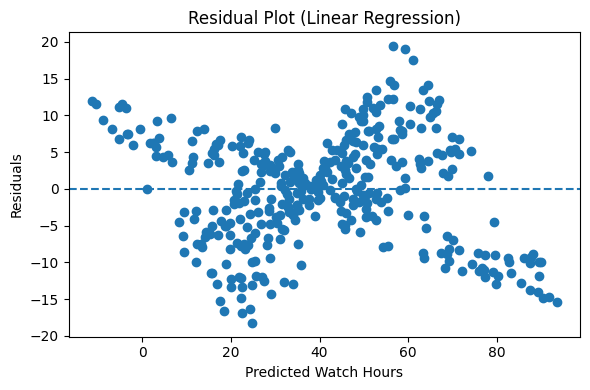

In [24]:
residuals = y2_test - pred
plt.figure(figsize=(6,4))
plt.scatter(pred, residuals)
plt.axhline(0, linestyle="--")
plt.title("Residual Plot (Linear Regression)")
plt.xlabel("Predicted Watch Hours")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


In [25]:
lin_coef = pd.Series(lin.coef_, index=X2.columns).sort_values(key=abs, ascending=False)
lin_coef.head(10)


subscription_type_Unknown     10.117304
promo_and_low_watch           -7.476120
watch_per_fee_ratio            7.423675
subscription_type_Standard     5.061650
received_promotions_Yes        4.346951
country_Unknown               -3.456710
monthly_fee                    3.295001
is_loyal                       1.116740
heavy_mobile_user              1.025463
country_Usa                    1.022823
dtype: float64